In [1]:
import h5py
import numpy as np
import matplotlib
#matplotlib.use('Agg')
matplotlib.rcParams['mathtext.default'] = 'regular'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from PIL import Image
import numpy.ma as ma

/Users/litadlc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mp = 1.672622e-24 # mass of hydrogren atom, in grams
kb = 1.380658e-16 # boltzmann constant in ergs/K

d_c = mp # code density unit, 1 mp / cm^3
l_c = 3.08567758e18 # code length unit, 1 pc in cm
l_km = 3.08567758e13 # code length unit, 1pc in km
t_c = 3.15569e10    # code time unit, 1 kyr in seconds
v_c = l_c / t_c     # code velocity unit
v_km = l_km / t_c     # code velocity unit
p_c = d_c * v_c * v_c # code pressure unit
m_c = d_c * l_c * l_c * l_c / 1.9891e33 # code mass unit to solar masses

In [3]:
istart = 398 # starting file number
iend   = 398 # ending file number
dx = 5./64. # size scale, pc per cell
t_cc = 39.8 # cloud crushing time in kyr, n = 0.5 cloud
#t_cc = 56.4 # cloud crushing time in kyr, n = 1 cloud
dnamein='/Users/litadlc/Desktop/Data/' # directory where the file is located
dnameout='/Users/litadlc/Desktop/10tcc/' # directory where the plot will be saved

In [4]:
for i in range(istart,iend+1,30):
    print(i)
f = h5py.File(dnamein+str(i)+'.h5', 'r') # open the hdf5 file for reading
head = f.attrs # read the header attributes into structure, head
gamma = head['gamma'][0] # ratio of specific heats
t  = head['t'][0] # time of this snapshot, in kyr
nx = head['dims'][0] # number of cells in the x direction
ny = head['dims'][1] # number of cells in the y direction
nz = head['dims'][2] # number of cells in the z direction
d  = f['density'][:]
mx = f['momentum_x'][:]
#E = f['Energy'][:]
GE = f['GasEnergy'][:] # internal energy in code units, d*e
f.close()

398


In [6]:
# numpy histogram functions like 1D arrays
#n_hist = np.reshape(log_n, nx_10*ny_10*nz_10)
vx = ((mx)/(d))*v_km
vx_260260=vx[250,:,:]

mass = d*(dx**3)*m_c # mass in solar masses
v_hist = np.reshape(vx, nx*ny*nz)
m_hist = np.reshape(mass, nx*ny*nz)

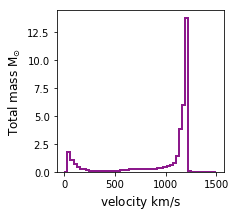

In [7]:
xbins = np.linspace(0,1500,50)
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0.19,0.17,0.58,0.75])
n, bins, patches = ax.hist(v_hist,xbins,histtype = 'step',alpha=0.9,linewidth=2.0, color = 'purple',weights=m_hist)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
ax.set_xlabel('velocity $km/s$',fontsize=12)
ax.set_ylabel('Total mass $M_{\odot}$',fontsize=12)
#ax.set_xlim(0,1500)
# save the figure
#plt.savefig(dnameout+'1D_vel_m_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

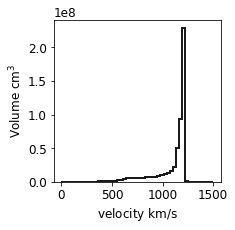

In [9]:
xbins = np.linspace(0,1500,50)
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0.19,0.17,0.58,0.75])
n_v, bins, patches = ax.hist(v_hist,xbins,histtype = 'step',alpha=0.9,linewidth=2.0, color = 'black')
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)
ax.set_xlabel('velocity $km/s$',fontsize=12)
ax.set_ylabel('Volume $cm^{3}$',fontsize=12)

# save the figure
#plt.savefig(dnameout+'1D_vel_vol_'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [24]:
#Using simpsons rule to find the total area of the histogram. Once the area is found I indentified the total number
#of cells that are between 1,000 to 1,250 km/s. Once these two values are found I divided the cells between the
#1,000 to 1,250 km/s by the total number of cells to determine the percentage of gas that occupies high velocities.

def simpsons_Rule(F, dx):
    sum_result = F[0] + F[-1] + 4*sum(F[1:-1:2]) + 2*sum(F[2:-1:2])
    return sum_result*dx/3
dx = 30
highvel = simpsons_Rule((n_v), dx)
print((np.sum(n_v[33:42])/np.sum(n_v))*100)


81.1177929685442


In [11]:
T = (GE*(gamma-1.0)*p_c)/(d*kb)
log_T = np.log10(T)

log_temp_1DH_10=np.reshape(log_T,nx*ny*nz)

In [12]:
T_SiII=np.where(np.logical_and(log_temp_1DH_10>=3.8, log_temp_1DH_10<=4.65))
T_OVI=np.where(np.logical_and(log_temp_1DH_10>=5.3, log_temp_1DH_10<=5.65))
T_CIV=np.where(np.logical_and(log_temp_1DH_10>=4.85, log_temp_1DH_10<=5.25))

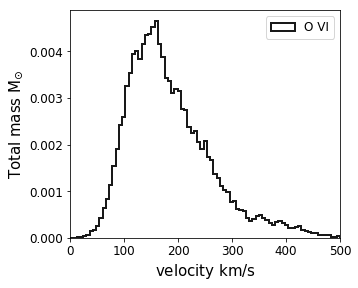

In [14]:
xbins = np.linspace(0,1200,200)
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0.2,0.18,0.75,0.79])
v_hist_T_OVI=v_hist[T_OVI]
m_hist_T_OVI=m_hist[T_OVI]
plt.hist(v_hist_T_OVI,xbins,histtype = 'step', alpha=0.9,linewidth=2.0,color='black',label ='O VI',weights=m_hist_T_OVI)
plt.legend(loc='upper right',fontsize=12)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
ax.set_xlabel('velocity $km/s$',fontsize=15)
ax.set_ylabel('Total mass $M_{\odot}$',fontsize=15)
ax.set_xlim(0,500)
plt.show()

#plt.savefig(dnameout+'1D_vel_mass_OVI_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)

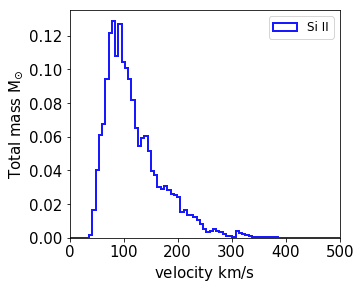

In [15]:
xbins = np.linspace(0,1200,200)
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0.2,0.18,0.75,0.79])
v_hist_T_SiII=v_hist[T_SiII]
m_hist_T_SiII=m_hist[T_SiII]
plt.hist(v_hist_T_SiII,xbins,histtype = 'step', alpha=0.9,linewidth=2.0,color='blue',label ='Si II',weights=m_hist_T_SiII)
plt.legend(loc='upper right',fontsize=12)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
ax.set_xlabel('velocity $km/s$',fontsize=15)
ax.set_ylabel('Total mass $M_{\odot}$',fontsize=15)
ax.set_xlim(0,500)
plt.show()

#plt.savefig(dnameout+'1D_vel_mass_SiII_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)

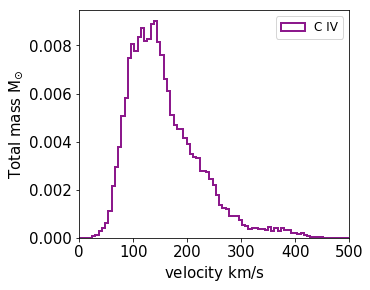

In [16]:
xbins = np.linspace(0,1200,200)
fig = plt.figure(figsize=(5,4))
ax = fig.add_axes([0.2,0.18,0.75,0.79])
v_hist_T_CIV=v_hist[T_CIV]
m_hist_T_CIV=m_hist[T_CIV]
plt.hist(v_hist_T_CIV,xbins,histtype = 'step', alpha=0.9,linewidth=2.0,color='purple',label ='C IV',weights=m_hist_T_CIV)
plt.legend(loc='upper right',fontsize=12)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
ax.set_xlabel('velocity $km/s$',fontsize=15)
ax.set_ylabel('Total mass $M_{\odot}$',fontsize=15)
ax.set_xlim(0,500)
plt.show()

#plt.savefig(dnameout+'1D_vel_mass_CIV_newtemp_'+str(i)+'.png', dpi=300)
#plt.close(fig)